In [ ]:
import databaseconfig as cfg

In [96]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, select
engine = create_engine('postgresql+psycopg2://localhost:5432/Employee_Database')
import pandas as pd


In [97]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [98]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)


In [4]:
# Print all of the classes mapped to the Base
inspector = inspect(engine)
inspector.get_table_names()

['departments', 'employees', 'titles', 'dept_emp', 'dept_manager', 'salaries']

In [5]:
columns = inspector.get_columns('employees')
for c in columns:
    print(c['name'],c['type'])

emp_no INTEGER
birth_date VARCHAR(45)
first_name VARCHAR(250)
last_names VARCHAR(250)
gender VARCHAR(2)
hire_date VARCHAR(45)


In [6]:
columns = inspector.get_columns('salaries')
for c in columns:
    print(c['name'],c['type'])

emp_no INTEGER
salary INTEGER
from_date VARCHAR(100)
to_date VARCHAR(100)


In [7]:
columns = inspector.get_columns('titles')
for c in columns:
    print(c['name'],c['type'])

emp_no INTEGER
title VARCHAR(350)
from_date VARCHAR(100)
to_date VARCHAR(100)


In [44]:
title_result = engine.execute('SELECT titles.title, ROUND(AVG(salaries.salary),2) AS average_salary FROM titles INNER JOIN salaries ON titles.emp_no = salaries.emp_no GROUP BY titles.title;')


In [45]:
title = []
average_salary = []
for r in title_result:
    average_salary.append(float(r.average_salary))
    title.append(r.title)

In [48]:
avg_title_salary_df = pd.DataFrame({'Title':title,'Average Salary':average_salary})
avg_title_salary_df


,Title,Average Salary
0,Assistant Engineer,48493.20
1,Engineer,48539.78
2,Manager,51531.04
3,Senior Engineer,48506.75
4,Senior Staff,58503.29
5,Staff,58465.27
6,Technique Leader,48580.51


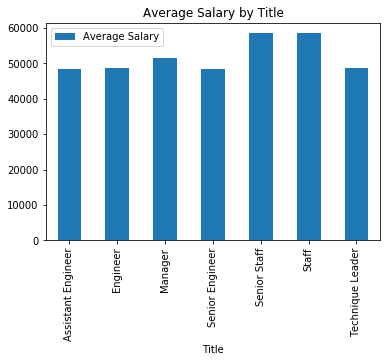

In [51]:
# Create a bar chart of average salary by title.
avg_title_salary_df.plot(x ='Title', y='Average Salary',title = "Average Salary by Title",kind = 'bar');

In [66]:
# Create a histogram to visualize the most common salary ranges for employees.
first_n = []
last_n = []
salary = []

In [67]:
hist_result = engine.execute('SELECT employees.first_name, employees.last_names, salaries.salary FROM employees INNER JOIN salaries ON employees.emp_no = salaries.emp_no')
for r in hist_result:
    first_n.append(r.first_name)
    last_n.append(r.last_names)
    salary.append(float(r.salary))

In [83]:
common_salary_df = pd.DataFrame({'First Name':first_n,'Last Name':last_n,'Salary':salary})
common_salary_df['Salary'].max()

129492.0

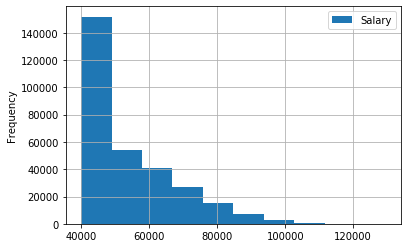

In [90]:
common_salary_df.plot(kind = 'hist',grid=True);